# 1 - Exploratory Data Analysis

<span style="font-size: 17px;">
    In this notebook, I will first explore the data trying to understand the features and the target. I will look at null values, features that do not have variability, outliers, the features relationship with the target and the form of the target distribution. <span style="font-size: 25px;"> to see what changes I can make that might improve the model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [2]:
test = pd.read_csv('datasets/test.csv')
train = pd.read_csv('datasets/train.csv')

<span style="font-size: 17px;"> Test does not have SalePrice (last column in train), so let's compare if the rest of the columns are the same

In [3]:
print((test.columns == train.columns[:-1]).all())
print(train.columns)

True
Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
    

<span style="font-size: 17px;"> Let's standardize columns name with lowercase and no spaces...

In [4]:
train.columns = train.columns.str.lower().str.replace(' ','_')
test.columns = test.columns.str.lower().str.replace(' ','_')
print(train.columns)

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [5]:
print('Train Dataset Shape: ',train.shape)
print('Train Dataset Duplicates: ', train.duplicated().sum())

Train Dataset Shape:  (2051, 81)
Train Dataset Duplicates:  0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

<span style="font-size: 17px;"> According to the dataset dictionary, id and pid are unique identifiers for the observations... That is, they are not to be used by the model. Let's create a list with these two columns to remove.

In [7]:
to_remove = ['id', 'pid']

## Category features
<span style="font-size: 17px;"> Many object features and many null values in some features...
<br>
Object features are generally categories, depending on the number of unique values.
<br>
One thing to check about category features is if any of them present high concentration in the categories, which does not translate into variability of the response.
<br>
Let's see if there are features where one category concentrate more than 95% of the observations in the dataset...

In [8]:
high_concentration_features = []

# Iterate over each column
for column in train.columns:
    # Calculate the percentage of occurrences for each category
    category_percentages = train[column].value_counts(normalize=True) * 100
    # Check if the maximum percentage is greater than 95%
    if category_percentages.max() > 95:
        high_concentration_features.append(column)

print("Features with categories that concentrate more than 95% of the observations:", high_concentration_features)

Features with categories that concentrate more than 95% of the observations: ['street', 'utilities', 'land_slope', 'condition_2', 'roof_matl', 'heating', 'low_qual_fin_sf', 'kitchen_abvgr', 'garage_cond', '3ssn_porch', 'pool_area', 'misc_val']


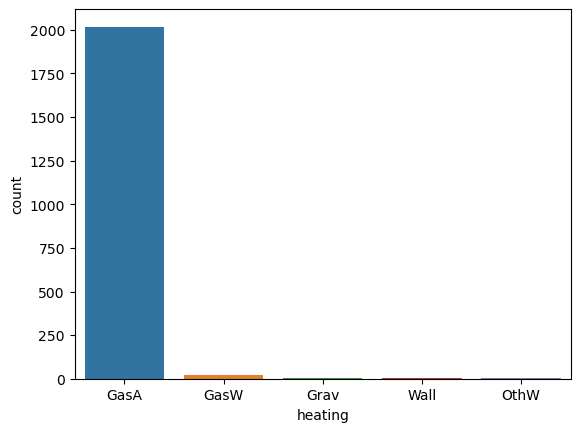

In [9]:
sns.countplot(data = train, x = 'heating');

<span style="font-size: 17px;"> A feature does not have much variability if 95% or more of the observations belongs to one class only. In the context of linear regression, it does not provide useful information for predicting the target variable.

In [10]:
# adding the high concentration features to the list of features to remove from the model
to_remove += high_concentration_features

## Null values

In [11]:
null_columns = train.columns[train.isna().any()].tolist()
print(train[null_columns].isna().sum().sort_values(ascending = True))

total_bsmt_sf        1
garage_area          1
bsmt_unf_sf          1
bsmtfin_sf_2         1
bsmtfin_sf_1         1
garage_cars          1
bsmt_full_bath       2
bsmt_half_bath       2
mas_vnr_area        22
mas_vnr_type        22
bsmtfin_type_1      55
bsmt_qual           55
bsmt_cond           55
bsmtfin_type_2      56
bsmt_exposure       58
garage_type        113
garage_finish      114
garage_qual        114
garage_cond        114
garage_yr_blt      114
lot_frontage       330
fireplace_qu      1000
fence             1651
alley             1911
misc_feature      1986
pool_qc           2042
dtype: int64


<span style="font-size: 17px;">
For the same reason as features which more than 95% of observations fit in only one category, those features that does not present value in more than 95% of the observations will also be removed from the model.

In [12]:
# Calculate the percentage of null values for each feature
null_percentages = (train.isnull().sum() / train.shape[0]) * 100

# Filter features with more than 95% null values
high_null_features = null_percentages[null_percentages > 95].index.tolist()

print("Features with more than 95% null values:", high_null_features)

Features with more than 95% null values: ['pool_qc', 'misc_feature']


In [13]:
# adding the features with 95% of null values to the list of features to remove
to_remove += high_null_features
print(f'Number of columns to remove: ', len(to_remove))
print(to_remove)

Number of columns to remove:  16
['id', 'pid', 'street', 'utilities', 'land_slope', 'condition_2', 'roof_matl', 'heating', 'low_qual_fin_sf', 'kitchen_abvgr', 'garage_cond', '3ssn_porch', 'pool_area', 'misc_val', 'pool_qc', 'misc_feature']


## Numeric Features
<span style="font-size: 17px;"> Now, let's select the numerics to see their relation to the target and with each other... </span>

In [14]:
train_columns = list(train.columns)
X_columns = list(set(train_columns)-set(to_remove))
X = train[X_columns]
numerics = list(X.select_dtypes(include=['float64', 'int64']).columns)
numerics.remove('saleprice')
print(f'Number of X columns: ', len(X_columns))
print(numerics)

Number of X columns:  65
['2nd_flr_sf', 'bsmt_unf_sf', 'garage_yr_blt', 'bedroom_abvgr', '1st_flr_sf', 'total_bsmt_sf', 'mo_sold', 'bsmtfin_sf_2', 'ms_subclass', 'totrms_abvgrd', 'overall_qual', 'year_remod/add', 'open_porch_sf', 'lot_frontage', 'wood_deck_sf', 'garage_cars', 'full_bath', 'enclosed_porch', 'fireplaces', 'lot_area', 'yr_sold', 'garage_area', 'overall_cond', 'half_bath', 'screen_porch', 'mas_vnr_area', 'year_built', 'bsmt_full_bath', 'gr_liv_area', 'bsmt_half_bath', 'bsmtfin_sf_1']


In [15]:
X[numerics].head()

,2nd_flr_sf,bsmt_unf_sf,garage_yr_blt,bedroom_abvgr,1st_flr_sf,total_bsmt_sf,mo_sold,bsmtfin_sf_2,ms_subclass,totrms_abvgrd,...,garage_area,overall_cond,half_bath,screen_porch,mas_vnr_area,year_built,bsmt_full_bath,gr_liv_area,bsmt_half_bath,bsmtfin_sf_1
0,754,192.0,1976.0,3,725,725.0,3,0.0,60,6,...,475.0,8,1,0,289.0,1976,0.0,1479,0.0,533.0
1,1209,276.0,1997.0,4,913,913.0,4,0.0,60,8,...,559.0,5,1,0,132.0,1996,1.0,2122,0.0,637.0
2,0,326.0,1953.0,3,1057,1057.0,1,0.0,20,5,...,246.0,7,0,0,0.0,1953,1.0,1057,0.0,731.0
3,700,384.0,2007.0,3,744,384.0,4,0.0,60,7,...,400.0,5,1,0,0.0,2006,0.0,1444,0.0,0.0
4,614,676.0,1957.0,3,831,676.0,3,0.0,50,6,...,484.0,8,0,0,0.0,1900,0.0,1445,0.0,0.0


In [16]:
print(numerics)

['2nd_flr_sf', 'bsmt_unf_sf', 'garage_yr_blt', 'bedroom_abvgr', '1st_flr_sf', 'total_bsmt_sf', 'mo_sold', 'bsmtfin_sf_2', 'ms_subclass', 'totrms_abvgrd', 'overall_qual', 'year_remod/add', 'open_porch_sf', 'lot_frontage', 'wood_deck_sf', 'garage_cars', 'full_bath', 'enclosed_porch', 'fireplaces', 'lot_area', 'yr_sold', 'garage_area', 'overall_cond', 'half_bath', 'screen_porch', 'mas_vnr_area', 'year_built', 'bsmt_full_bath', 'gr_liv_area', 'bsmt_half_bath', 'bsmtfin_sf_1']


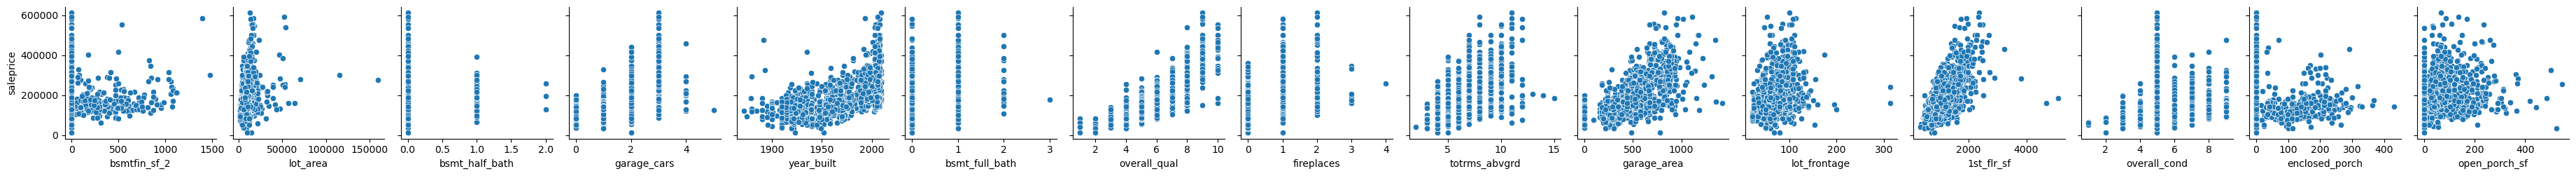

In [22]:
sns.pairplot(data = X, x_vars = numerics[:15], y_vars = 'saleprice')
plt.show();

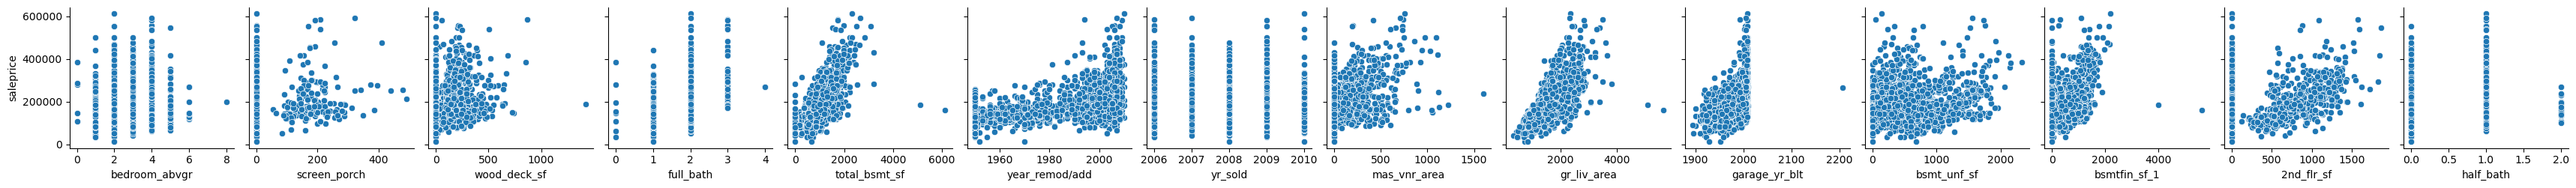

In [21]:
sns.pairplot(data = X, x_vars = numerics[15:], y_vars = 'saleprice')
plt.show();

<span style="font-size: 17px;"> Two features that are in numericals but will be better treated as category features are </span> ```ms_subclass``` <span style="font-size: 17px;"> and </span>```mo_sold```. <span style="font-size: 17px;">Their dtypes will be changed to category inside the train class definition.

In [17]:
cat_features = ['ms_subclass', 'mo_sold']
numerics = list(set(numerics) - set(cat_features))

### Features with outliers
<span style="font-size: 17px;"> It is possible to see some outliers in these features, such as the two values on the right of the scatter plot of ground living area and saleprice... <br>
While modelling, I will test if removing these outliers can improve the model.

In [18]:
# dictionary with outliers features and the respective values the outliers exceed
outliers_features = {'gr_liv_area': 4000, 'bsmtfin_sf_1': 3000, 'wood_deck_sf': 1000, '1st_flr_sf': 4000, \
                     'lot_frontage': 250, 'lot_area':100000, 'total_bsmt_sf': 4000}

In [19]:
X[X['lot_frontage']>250].shape

(2, 65)

In [20]:
test_outliers = X.copy()

for feature, threshold in outliers_features.items():
    print(feature, threshold)
    mask = (test_outliers[feature] <= threshold) | (test_outliers[feature].isnull())
    test_outliers = test_outliers[mask]

print(test_outliers.shape)

gr_liv_area 4000
bsmtfin_sf_1 3000
wood_deck_sf 1000
1st_flr_sf 4000
lot_frontage 250
lot_area 100000
total_bsmt_sf 4000
(2045, 65)


In [21]:
print('Number of observations removed after removing outliers: {}'.format(X.shape[0] - test_outliers.shape[0]))

Number of observations removed after removing outliers: 6


### Features with many zeros
<span style="font-size: 17px;"> It is possible to see also that some features have zeros that do not help to see the relationship of the presence of that feature with the target...

In [22]:
# features with many zeros
zero_features = ['garage_area','bsmtfin_sf_1', 'bsmtfin_sf_2', 'enclosed_porch', 'open_porch_sf', 'wood_deck_sf', \
                 'mas_vnr_area', 'screen_porch', 'total_bsmt_sf', 'bsmt_unf_sf', '2nd_flr_sf']

for column in zero_features:
    print("Percentage of observations {} = 0: \n {:.3}".format(column, (X[column] == 0).mean() * 100))

Percentage of observations garage_area = 0: 
 5.51
Percentage of observations bsmtfin_sf_1 = 0: 
 32.0
Percentage of observations bsmtfin_sf_2 = 0: 
 87.9
Percentage of observations enclosed_porch = 0: 
 84.1
Percentage of observations open_porch_sf = 0: 
 44.5
Percentage of observations wood_deck_sf = 0: 
 52.4
Percentage of observations mas_vnr_area = 0: 
 59.3
Percentage of observations screen_porch = 0: 
 91.2
Percentage of observations total_bsmt_sf = 0: 
 2.63
Percentage of observations bsmt_unf_sf = 0: 
 8.04
Percentage of observations 2nd_flr_sf = 0: 
 58.1


<span style="font-size: 17px;">
Since there are some features with lots of zeros, in the context of linear regression it can change a lot the model and may not translate the relationship between the value of the feature and target very well... <br>
For the features with more than 30% of the observations with zero as value, I will test if replacing them with the mean value of the column can improve the model.

In [23]:
testing_zero = X.copy()
zero_features = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'enclosed_porch', 'open_porch_sf', 'wood_deck_sf', \
                 'mas_vnr_area', 'screen_porch', '2nd_flr_sf']

for feature in zero_features:
    mask = testing_zero[feature] == 0
    testing_zero.loc[mask, feature] = np.nan
    testing_zero.loc[mask, feature] = testing_zero[feature].mean()
    
# features with many zeros
zero_features = ['garage_area','bsmtfin_sf_1', 'bsmtfin_sf_2', 'enclosed_porch', 'open_porch_sf', 'wood_deck_sf', \
                 'mas_vnr_area', 'screen_porch', 'total_bsmt_sf', 'bsmt_unf_sf', '2nd_flr_sf']

for column in zero_features:
    print("Percentage of observations {} = 0: \n {:.3}".format(column, (testing_zero[column] == 0).mean() * 100))

Percentage of observations garage_area = 0: 
 5.51
Percentage of observations bsmtfin_sf_1 = 0: 
 0.0
Percentage of observations bsmtfin_sf_2 = 0: 
 0.0
Percentage of observations enclosed_porch = 0: 
 0.0
Percentage of observations open_porch_sf = 0: 
 0.0
Percentage of observations wood_deck_sf = 0: 
 0.0
Percentage of observations mas_vnr_area = 0: 
 0.0
Percentage of observations screen_porch = 0: 
 0.0
Percentage of observations total_bsmt_sf = 0: 
 2.63
Percentage of observations bsmt_unf_sf = 0: 
 8.04
Percentage of observations 2nd_flr_sf = 0: 
 0.0


## Target distribution form
...
<br>
...
<br>
...


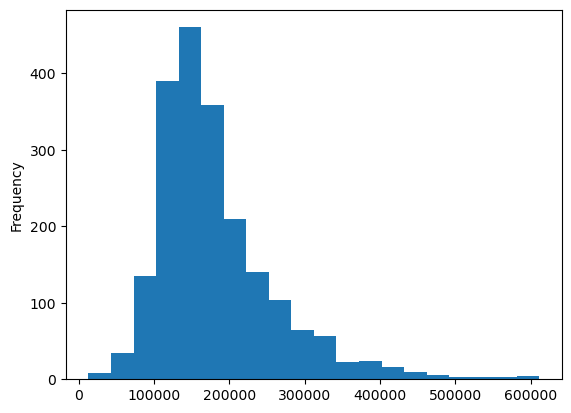

In [28]:
train['saleprice'].plot(kind='hist', bins=20);

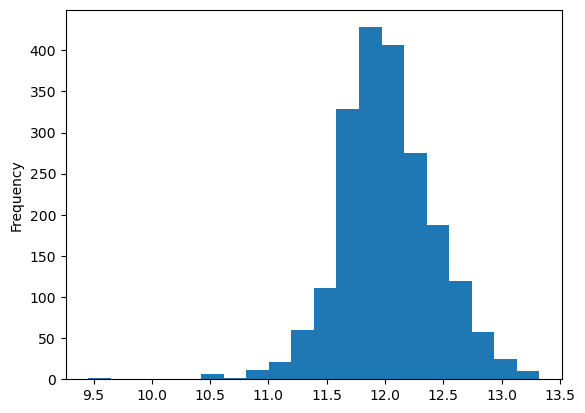

In [29]:
np.log(train['saleprice']).plot(kind='hist', bins=20);

## Correlation and VIF

In [30]:
print(numerics)

['enclosed_porch', 'lot_frontage', 'half_bath', 'bsmtfin_sf_1', 'full_bath', 'garage_yr_blt', 'fireplaces', 'lot_area', 'bsmt_full_bath', 'year_built', 'bedroom_abvgr', 'yr_sold', 'overall_cond', 'gr_liv_area', 'bsmt_half_bath', 'year_remod/add', '2nd_flr_sf', 'overall_qual', '1st_flr_sf', 'bsmt_unf_sf', 'screen_porch', 'mo_sold', 'garage_cars', 'ms_subclass', 'wood_deck_sf', 'bsmtfin_sf_2', 'totrms_abvgrd', 'total_bsmt_sf', 'mas_vnr_area', 'garage_area', 'open_porch_sf']


<span style="font-size: 17px;">
    Because it is necessary to fill null values for the heat map of the correlation, let's create a dataframe from X and fill the null values using the mean of the features. While modelling, different methods for filling null values will be tested.

In [31]:
for_correlation = X.copy()

for numeric in numerics:
    if for_correlation[numeric].isna().sum()!= 0:
        for_correlation.loc[for_correlation[numeric].isna(), numeric] = for_correlation[numeric].mean()

In [ ]:
plt.figure(figsize=(40, 40))
mask = np.triu(np.ones_like(for_correlation[numerics].corr()))
sns.heatmap(for_correlation[numerics].corr(), mask=mask, cmap='coolwarm',
            vmin = -1, vmax=1,annot=True)

<Axes: >

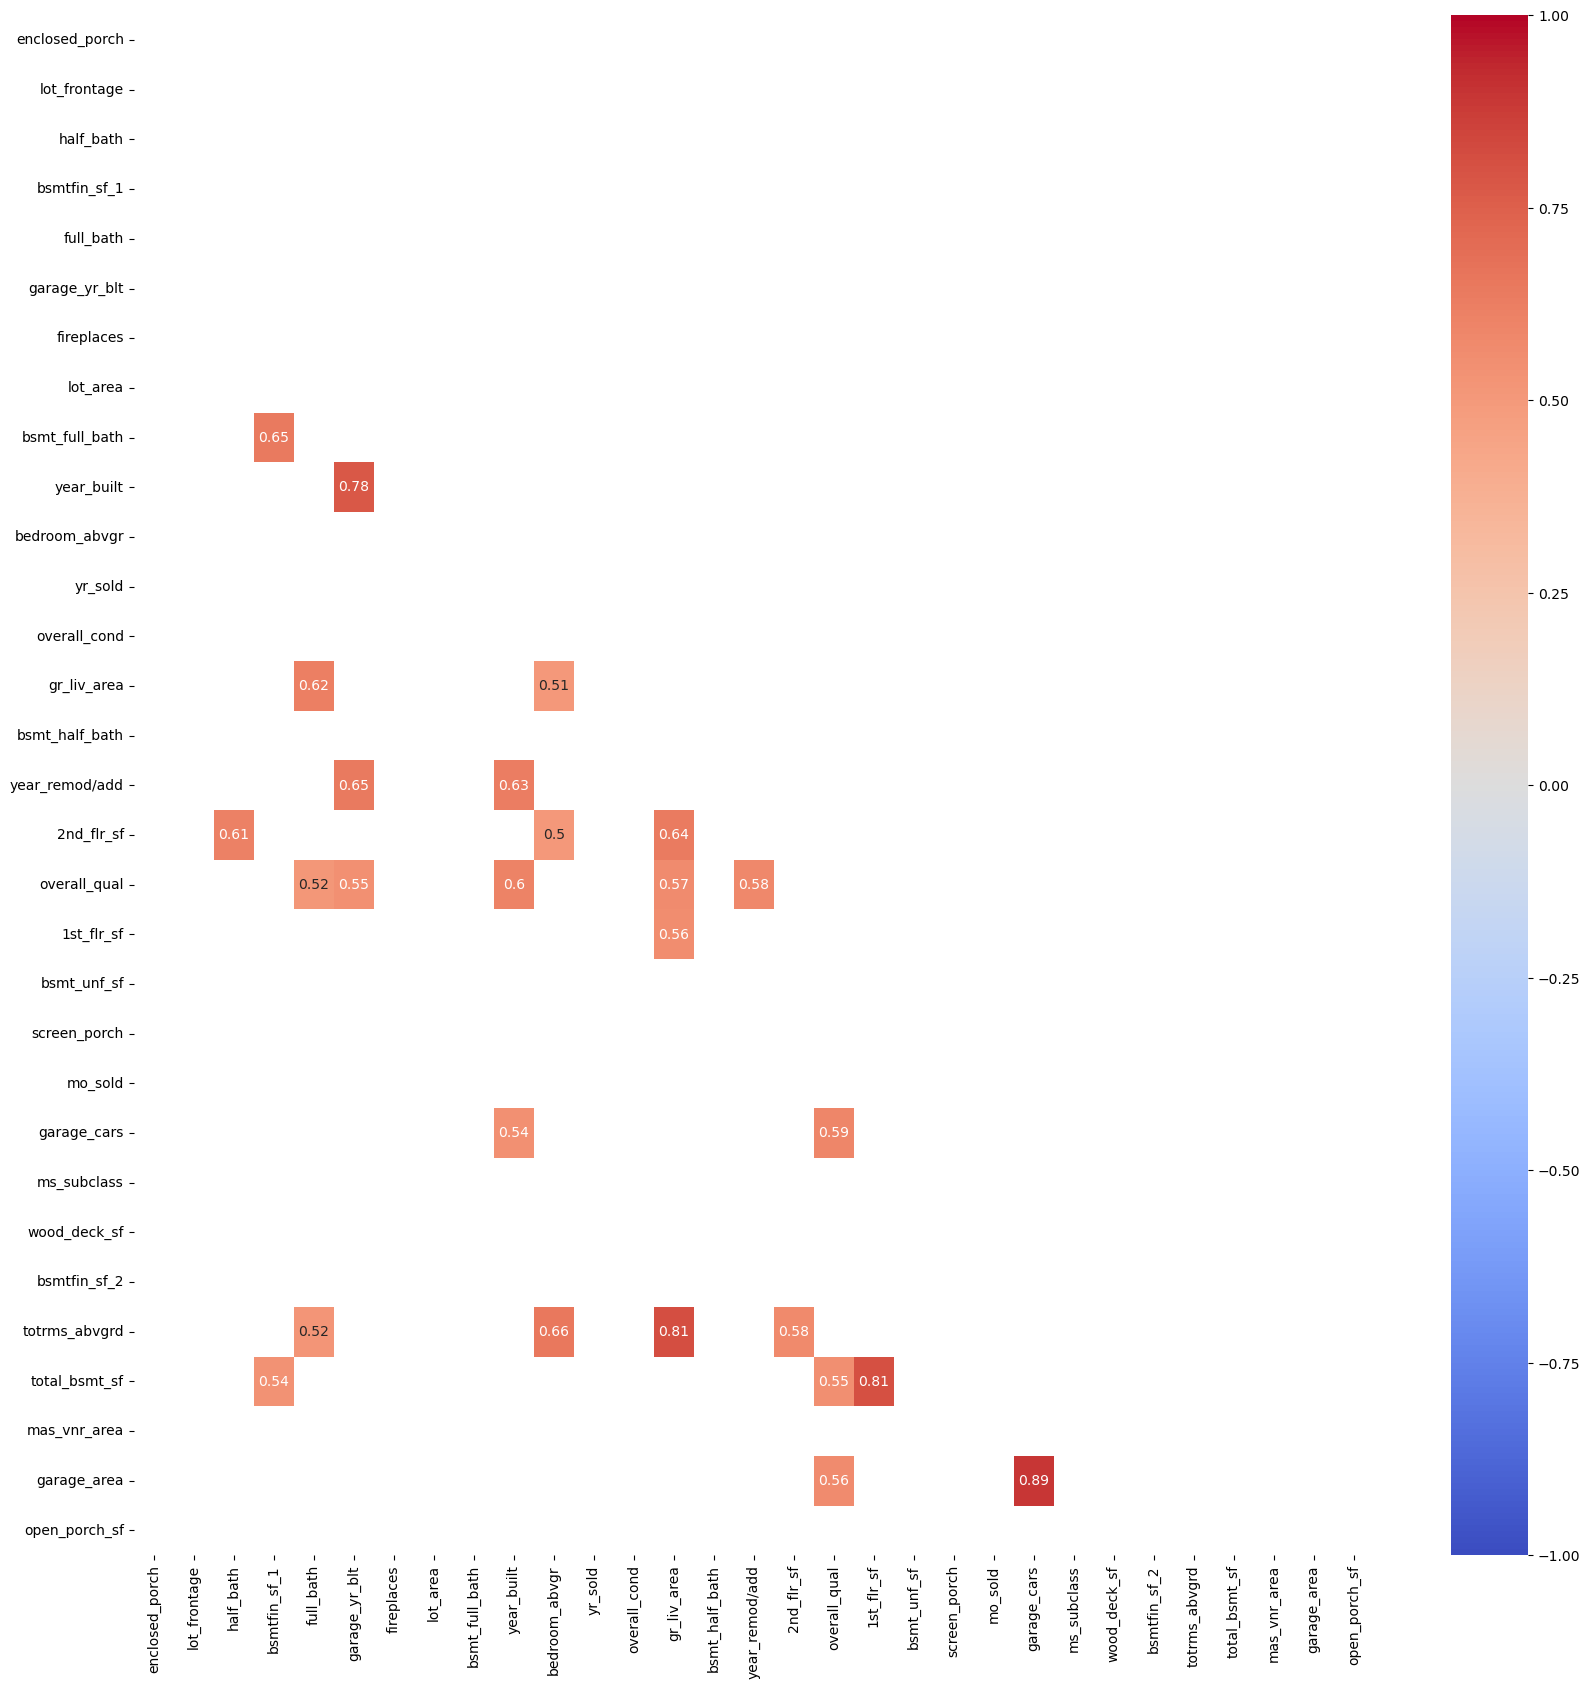

In [33]:
# Compute correlation matrix
corr_matrix = for_correlation[numerics].corr()

# Filter correlations greater than or equal to 0.50
strong_correlations = corr_matrix[corr_matrix >= 0.5]

# Create a mask for the filtered correlations
mask = np.triu(np.ones_like(strong_correlations, dtype=bool))

# Plot the heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(strong_correlations, mask=mask, cmap='coolwarm',
            vmin=-1, vmax=1, annot=True)
plt.show()

In [34]:
high_correlation = ['overall_qual', 'totrms_abvgrd', 'garage_cars', 'bsmtfin_sf_1', 'year_remod/add', 'garage_yr_blt', 'gr_liv_area',
'year_built', 'total_bsmt_sf', 'garage_area', '2nd_flr_sf']

In [35]:
for_vif = for_correlation[high_correlation]

vals = [VIF(for_vif, i)
for i in range(1, for_vif.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=for_vif.columns[1:]) 
vif

,vif
totrms_abvgrd,57.234023
garage_cars,35.900109
bsmtfin_sf_1,2.869217
year_remod/add,11778.451326
garage_yr_blt,17671.862869
gr_liv_area,71.616574
year_built,13720.925969
total_bsmt_sf,23.503973
garage_area,32.772450
2nd_flr_sf,6.152089


<span style="font-size: 17px;"> VIF values for </span> ```year_remod/add```, ```garage_yr_blt``` <span style="font-size: 17px;">  and </span> ```year_built``` <span style="font-size: 17px;"> are very high, indicating a multicollinearity between the three... It makes sense, since the respective descriptions are pretty related also. <br>
To avoid multicollinearity, I am only keeping one of them, the one that has the highest correlation with the target...

In [36]:
X[['year_remod/add', 'year_built', 'garage_yr_blt', 'saleprice']].corr()

,year_remod/add,year_built,garage_yr_blt,saleprice
year_remod/add,1.000000,0.629116,0.674024,0.550370
year_built,0.629116,1.000000,0.825316,0.571849
garage_yr_blt,0.674024,0.825316,1.000000,0.533922
saleprice,0.550370,0.571849,0.533922,1.000000


In [37]:
to_remove += ['year_remod/add', 'garage_yr_blt']

X = X.drop(['year_remod/add', 'garage_yr_blt'], axis=1)
print(list(X.columns))
print(to_remove)

['enclosed_porch', 'lot_frontage', 'half_bath', 'foundation', 'paved_drive', 'bsmt_qual', 'bsmtfin_sf_1', 'garage_finish', 'bsmtfin_type_1', 'full_bath', 'lot_config', 'exterior_1st', 'roof_style', 'neighborhood', 'exter_cond', 'fireplaces', 'bsmt_cond', 'ms_zoning', 'lot_area', 'bsmt_full_bath', 'year_built', 'bedroom_abvgr', 'yr_sold', 'overall_cond', 'exterior_2nd', 'garage_qual', 'bsmt_exposure', 'electrical', 'gr_liv_area', 'bsmt_half_bath', 'kitchen_qual', 'fireplace_qu', 'bldg_type', 'central_air', 'bsmtfin_type_2', 'garage_type', 'functional', '2nd_flr_sf', 'overall_qual', 'exter_qual', '1st_flr_sf', 'mas_vnr_type', 'heating_qc', 'bsmt_unf_sf', 'screen_porch', 'mo_sold', 'sale_type', 'fence', 'condition_1', 'garage_cars', 'ms_subclass', 'wood_deck_sf', 'lot_shape', 'bsmtfin_sf_2', 'alley', 'land_contour', 'totrms_abvgrd', 'total_bsmt_sf', 'house_style', 'mas_vnr_area', 'saleprice', 'garage_area', 'open_porch_sf']
['id', 'pid', 'street', 'utilities', 'land_slope', 'condition_2',

<span style="font-size: 17px;">
Let's define classes to transform datasets into different train dataset forms to see what is best for the model. Input datasets will be modified as described below:
<br><br>
<span style="font-size: 16px;">
(1) Standardizing columns
<br><br>
(2) Standardizing and filtering X columns
<br><br>
(3) 2 + removing the outliers in the features columns
<br><br>
(4) 2 + changing 0 values in the features columns
<br><br>
    
<span style="font-size: 17px;"> Then, I will fit these different X's into the linear model and see what is best.

In [2]:
class Original():
    def __init__(self):
        
        # numericals that are actually category features
        self.cat_features = ['ms_subclass', 'mo_sold']
        
        # to filter columns when the class is called
        self.train_columns = ['land_contour', 'bsmt_qual', 'bsmtfin_sf_2', 'screen_porch', 'lot_area', 'overall_qual',\
                          'full_bath', 'totrms_abvgrd', 'mo_sold', 'exter_cond', 'ms_subclass', 'heating_qc',\
                          '1st_flr_sf', 'bsmtfin_type_2', 'neighborhood', 'kitchen_qual', 'exterior_2nd',\
                          'central_air', 'garage_qual', 'garage_type', 'half_bath', 'bldg_type', 'lot_config',\
                          'functional', 'exterior_1st', 'garage_cars', 'exter_qual', 'open_porch_sf',\
                          'bsmt_exposure', 'alley', 'electrical', 'bedroom_abvgr', 'bsmt_full_bath',\
                          'condition_1', '2nd_flr_sf', 'fence', 'garage_area', 'mas_vnr_type', 'fireplace_qu',\
                          'overall_cond', 'bsmt_cond', 'enclosed_porch', 'bsmt_half_bath', 'ms_zoning',\
                          'fireplaces', 'paved_drive', 'bsmtfin_type_1', 'foundation', 'roof_style',\
                          'garage_finish', 'lot_frontage', 'lot_shape', 'bsmt_unf_sf', 'year_built',\
                          'bsmtfin_sf_1', 'gr_liv_area', 'sale_type', 'house_style', 'mas_vnr_area',\
                          'total_bsmt_sf', 'wood_deck_sf', 'yr_sold', 'saleprice']
        
        # to filter columns when the class is called
        self.x_columns = ['land_contour', 'bsmt_qual', 'bsmtfin_sf_2', 'screen_porch', 'lot_area', 'overall_qual',\
                          'full_bath', 'totrms_abvgrd', 'mo_sold', 'exter_cond', 'ms_subclass', 'heating_qc',\
                          '1st_flr_sf', 'bsmtfin_type_2', 'neighborhood', 'kitchen_qual', 'exterior_2nd',\
                          'central_air', 'garage_qual', 'garage_type', 'half_bath', 'bldg_type', 'lot_config',\
                          'functional', 'exterior_1st', 'garage_cars', 'exter_qual', 'open_porch_sf',\
                          'bsmt_exposure', 'alley', 'electrical', 'bedroom_abvgr', 'bsmt_full_bath',\
                          'condition_1', '2nd_flr_sf', 'fence', 'garage_area', 'mas_vnr_type', 'fireplace_qu',\
                          'overall_cond', 'bsmt_cond', 'enclosed_porch', 'bsmt_half_bath', 'ms_zoning',\
                          'fireplaces', 'paved_drive', 'bsmtfin_type_1', 'foundation', 'roof_style',\
                          'garage_finish', 'lot_frontage', 'lot_shape', 'bsmt_unf_sf', 'year_built',\
                          'bsmtfin_sf_1', 'gr_liv_area', 'sale_type', 'house_style', 'mas_vnr_area',\
                          'total_bsmt_sf', 'wood_deck_sf', 'yr_sold']        
        
        
        # features that will have outliers removed
        self.outliers_features = {'gr_liv_area': 4000, 'bsmtfin_sf_1': 3000, 'wood_deck_sf': 1000,\
                                   '1st_flr_sf': 3500, 'lot_frontage': 250, 'lot_area':100000,\
                                   'total_bsmt_sf': 4000}

        
        # features that have more than 10% of observations with zero
        self.zero_features = ['bsmtfin_sf_1', 'bsmtfin_sf_2', 'enclosed_porch', 'open_porch_sf', 'wood_deck_sf', \
                              'mas_vnr_area', 'screen_porch', '2nd_flr_sf'] 

    
    def zeros(self, dataset):
        for feature in self.zero_features:
            mask = dataset[feature] == 0
            dataset.loc[mask, feature] = np.nan
            dataset.loc[mask, feature] = dataset[feature].mean()
        return dataset
    
    
    def outliers(self, dataset):
        for feature, threshold in self.outliers_features.items():
            mask = (dataset[feature] <= threshold) | (dataset[feature].isnull())
            dataset = dataset[mask]
        return dataset
    
    
    def __call__(self, dataset):
        df = dataset.copy()
        #standardizing columns names
        df.columns = df.columns.str.lower().str.replace(' ','_')
        df[self.cat_features] = df[self.cat_features].astype('category')
        if ['id', 'pid'] in list(df.columns):
            df = df.drop(['id', 'pid'], axis=1)
        return df

In [3]:
class Train_Columns(Original):
    def __call__(self, dataset):
        df = super().__call__(dataset)
        df = df[self.train_columns]
        return df

In [4]:
class Train_Outliers(Train_Columns):
    def __call__(self, dataset):
        df = super().__call__(dataset)
        df = self.outliers(df)
        return df

In [5]:
class Train_Zeros(Train_Columns):
    def __call__(self, dataset):
        df = super().__call__(dataset)
        df = self.zeros(df)
        return df

In [6]:
class X_Columns(Original):
    def __call__(self, dataset):
        df = super().__call__(dataset)
        df = df[self.x_columns]
        df = self.outliers(df)
        return df